In [17]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
from pathlib import Path

# Paths to your image and annotation datasets
image_paths = {
    'Otterhound': 'C:/Users/colin/Downloads/Data Mining 1 - Programming Assignment 1/images/Images/n02091635-otterhound',
    'Labrador Retriever': 'C:/Users/colin/Downloads/Data Mining 1 - Programming Assignment 1/images/Images/n02099712-Labrador_retriever',
    'Standard Schnauzer': 'C:/Users/colin/Downloads/Data Mining 1 - Programming Assignment 1/images/Images/n02097209-standard_schnauzer',
    'Chow': 'C:/Users/colin/Downloads/Data Mining 1 - Programming Assignment 1/images/Images/n02112137-chow'
}

annotation_paths = {
    'Otterhound': 'C:/Users/colin/Downloads/Data Mining 1 - Programming Assignment 1/annotation/Annotation/n02091635-otterhound',
    'Labrador Retriever': 'C:/Users/colin/Downloads/Data Mining 1 - Programming Assignment 1/annotation/Annotation/n02099712-Labrador_retriever',
    'Standard Schnauzer': 'C:/Users/colin/Downloads/Data Mining 1 - Programming Assignment 1/annotation/Annotation/n02097209-standard_schnauzer',
    'Chow': 'C:/Users/colin/Downloads/Data Mining 1 - Programming Assignment 1/annotation/Annotation/n02112137-chow'
}

def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(annot)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin, ymin, xmax, ymax))
    return bbox

def process_images(image_folder, annotation_folder, output_folder):
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    
    for image_file in os.listdir(image_folder):
        if image_file.endswith(".jpg"):
            image_path = os.path.join(image_folder, image_file)
            
            annot_file = os.path.join(annotation_folder, image_file.replace('.jpg', ''))
            annot_file = annot_file + ".xml"
            
            if os.path.exists(annot_file):
                bbox = get_bounding_boxes(annot_file)
                
                img = Image.open(image_path)
                
                for i, box in enumerate(bbox):
                    cropped_img = img.crop(box)
                    resized_img = cropped_img.resize((128, 128), Image.Resampling.LANCZOS)
                    
                    new_image_name = f"{image_file.replace('.jpg', '')}_{i}.jpg"
                    new_image_path = os.path.join(output_folder, new_image_name)
                    resized_img.save(new_image_path)

for dog_class in image_paths:
    image_folder = image_paths[dog_class]
    annotation_folder = annotation_paths[dog_class]
    output_folder = f"./Cropped/{dog_class.replace(' ', '_')}"
    
    # Process images for each class
    process_images(image_folder, annotation_folder, output_folder)

print("Done")

Done


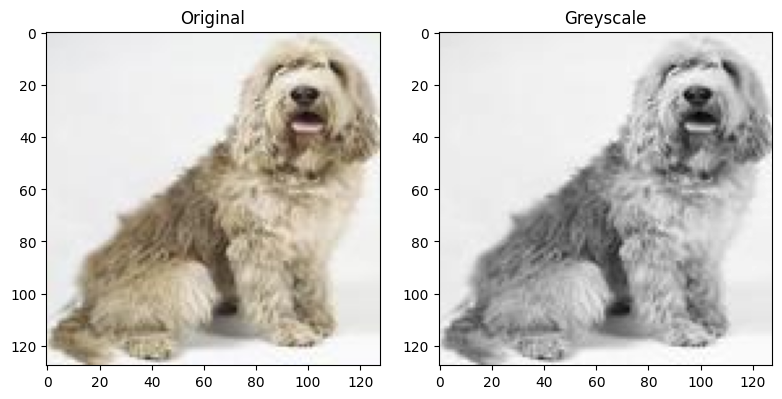

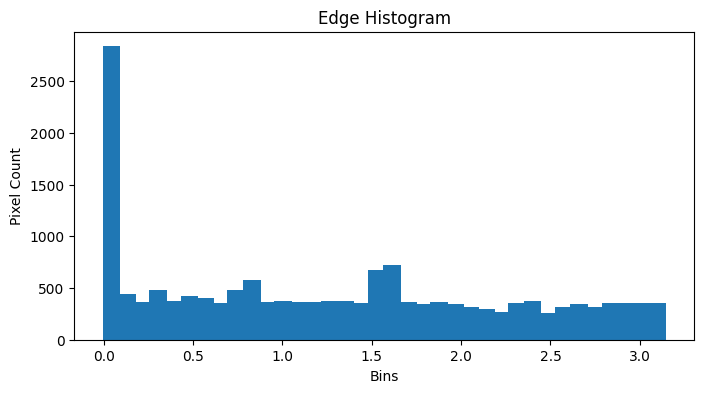

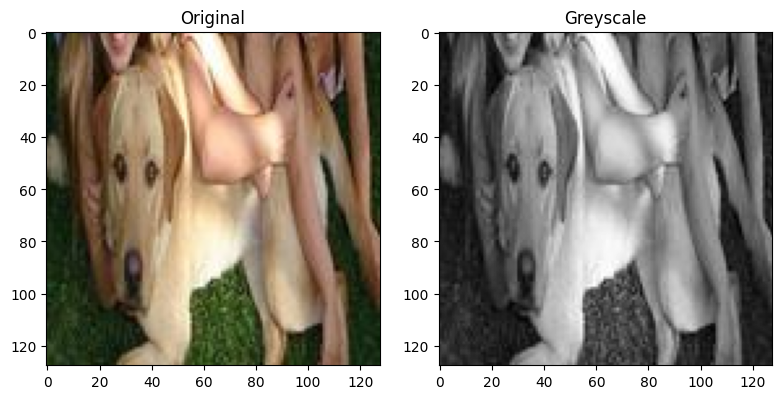

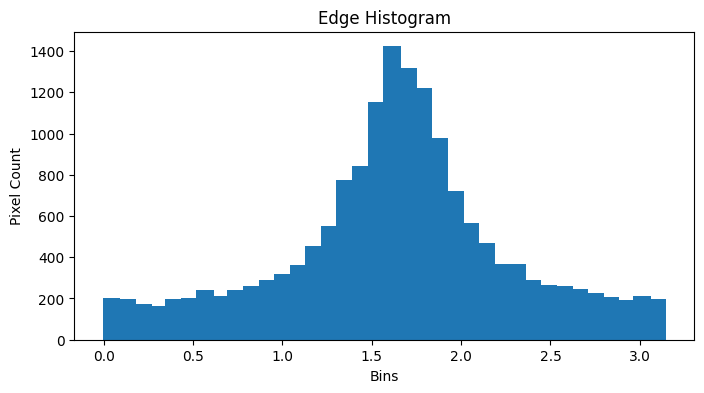

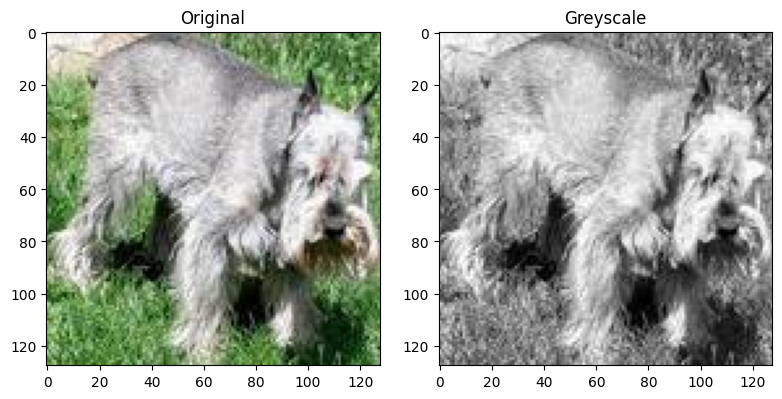

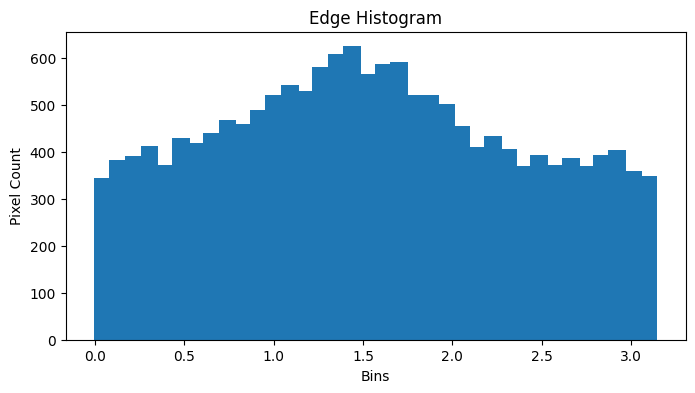

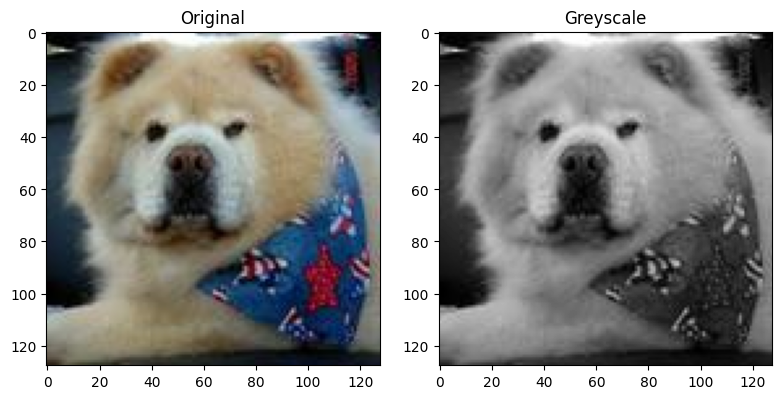

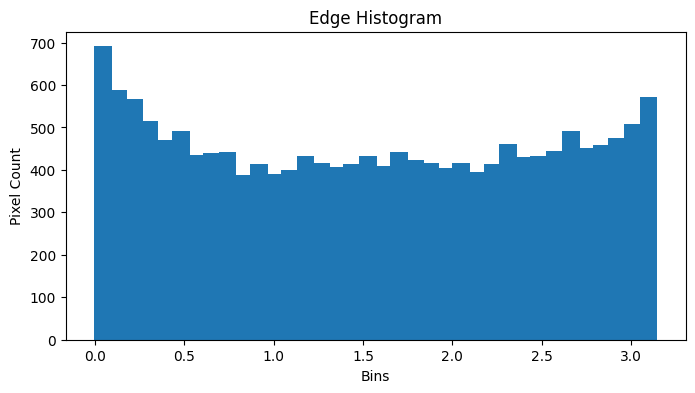

The Euclidean Distance is: 3320.0888542326693
The Manhattan Distance is: 11408.0
The Cosine Distance is: 0.4294903479739852


In [6]:
import numpy as np
from skimage import filters, color, io, exposure
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from skimage.color import rgb2gray
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

paths_to_images = {
    'Otterhound': r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\Cropped\Otterhound\n02091635_2_0.jpg',
    'Labrador Retriever': r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\Cropped\Labrador_Retriever\n02099712_980_0.jpg',
    'Standard Schnauzer': r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\Cropped\Standard_Schnauzer\n02097209_1_0.jpg',
    'Chow': r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\Cropped\Chow\n02112137_347_0.jpg'
}

def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

def image_processor(image_path):
    origial = io.imread(image_path)
    greyscale = rgb2gray(origial)

    angle_sobel = angle(filters.sobel_h(greyscale),
                        filters.sobel_v(greyscale))

    sobel_h = filters.sobel_h(greyscale)
    sobel_v = filters.sobel_v(greyscale)
    
    histogram, bins = exposure.histogram(angle_sobel, nbins=36)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()

    ax[0].imshow(origial)
    ax[0].set_title("Original")
    ax[1].imshow(greyscale, cmap=plt.cm.gray)
    ax[1].set_title("Greyscale")
    fig.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.bar(bins, histogram, width=0.1)
    plt.title('Edge Histogram')
    plt.xlabel('Bins')
    plt.ylabel('Pixel Count')
    plt.show()
    
    return histogram

histograms = {}
for dog_class, path in paths_to_images.items():
    histograms[dog_class] = image_processor(path)

histogram1 = histograms['Otterhound']
histogram2 = histograms['Labrador Retriever']

print(f"The Euclidean Distance is: {pairwise_distances([histogram1], [histogram2], metric='euclidean')[0][0]}")
print(f"The Manhattan Distance is: {pairwise_distances([histogram1], [histogram2], metric='manhattan')[0][0]}")
print(f"The Cosine Distance is: {pairwise_distances([histogram1], [histogram2], metric='cosine')[0][0]}")

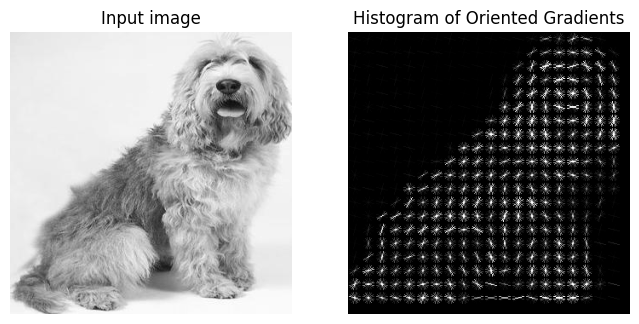

In [8]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import io, exposure

image_path = r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\images\Images\n02091635-otterhound\n02091635_2-0.jpg'

image = io.imread(image_path)
grey_image = color.rgb2gray(image)

fd, hog_image = hog(
    image,               
    orientations=8,            
    pixels_per_cell=(16, 16),  
    cells_per_block=(1, 1),    
    visualize=True,            
    channel_axis=-1,          
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(grey_image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


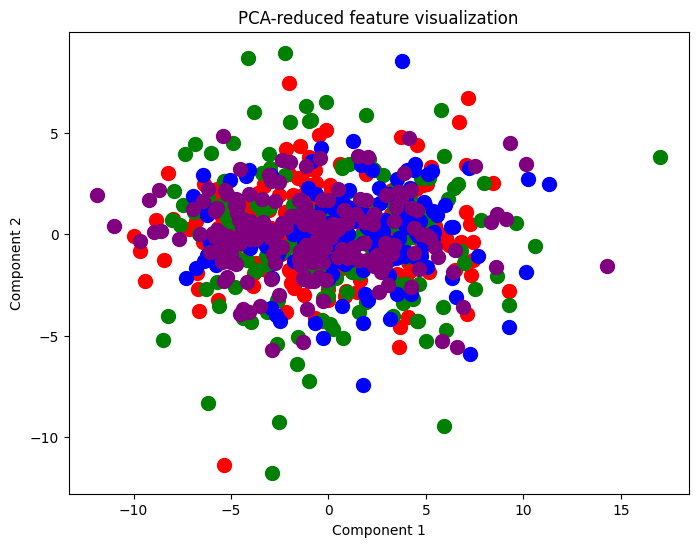

Unfortunately, it does not seem as there visually seperable classes, but this could be due to an error in my code


In [10]:
import os
import numpy as np
from skimage import filters, color, io, exposure
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cropped_images = r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\Cropped'

def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

def image_processer(image_path):
    original = io.imread(image_path)
    grey_image = color.rgb2gray(original)

    sobel_h = filters.sobel_h(grey_image)
    sobel_v = filters.sobel_v(grey_image)

    angle_sobel = angle(filters.sobel_h(grey_image),
                        filters.sobel_v(grey_image))
    
    histogram, bins = exposure.histogram(angle_sobel, nbins=36)

    return histogram

histograms = []
labels = []

for dog_class in os.listdir(cropped_images):
    class_dir = os.path.join(cropped_images, dog_class)
    
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            
            if img_file.lower().endswith(('.jpg')):
                hist = image_processer(img_path)
                histograms.append(hist)
                labels.append(dog_class)

X = np.array(histograms)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'purple']  
unique_labels = np.unique(labels)
for i, label in enumerate(unique_labels):
    indices = [j for j in range(len(labels)) if labels[j] == label]
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], color=colors[i % len(colors)], label=label, s=100)

plt.title('PCA-reduced feature visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

print("Unfortunately, it does not seem as there visually seperable classes, but this could be due to an error in my code")


In [4]:
import json
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

json_path_training = r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\train.json'
json_path_test = r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\test.json'
json_path_validation = r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\validation.json'

corpus = []

with open(json_path_test, 'r') as f:
    for line in f:
            record = json.loads(line)
            corpus.append(record['Tweet'])

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

print("CountVectorizer dimensionality:", X.shape)
print("CountVectorizer features:", vectorizer.get_feature_names_out())

print(X.toarray())

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 1))
X2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

print(X2.toarray())

vectorizer3 = TfidfVectorizer()
X3 = vectorizer3.fit_transform(corpus)
vectorizer3.get_feature_names_out()

print("\n")

print("TfidfVectorizer dimensionality:", X3.shape)
print("TfidfVectorizer features:", vectorizer3.get_feature_names_out())
print(X3.toarray())

print("\n")

print("Dimensionality of the two vector representations are: ", X.shape,",", X3.shape)
print("The token feature counts and TF-IDF feature counts are: ", vectorizer.get_feature_names_out()), ",", vectorizer3.get_feature_names_out()

CountVectorizer dimensionality: (1500, 6124)
CountVectorizer features: ['00' '000' '00am' ... 'zzz' 'élites' '相互フォロー']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


TfidfVectorizer dimensionality: (1500, 6124)
TfidfVectorizer features: ['00' '000' '00am' ... 'zzz' 'élites' '相互フォロー']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Dimensionality of the two vector representations are:  (1500, 6124) , (1500, 6124)
The token feature counts and TF-IDF feature counts are:  ['00' '000' '00am' ... 'zzz' 'élites' '相互フォロー']


(None,
 ',',
 array(['00', '000', '00am', ..., 'zzz', 'élites', '相互フォロー'], dtype=object))

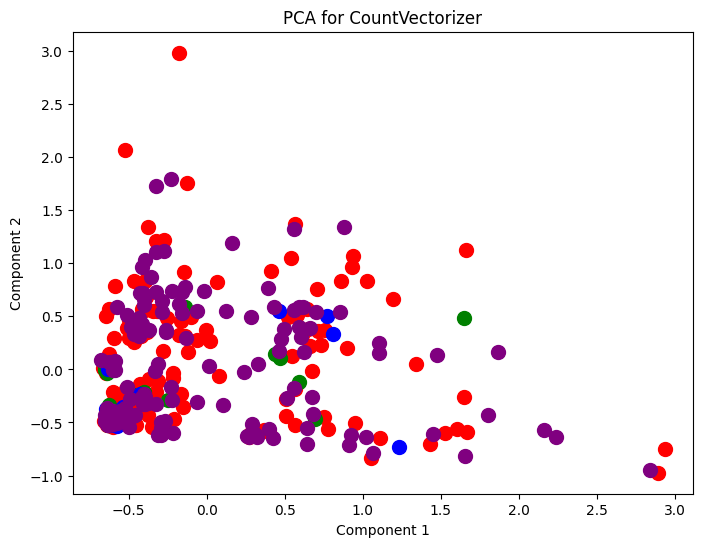

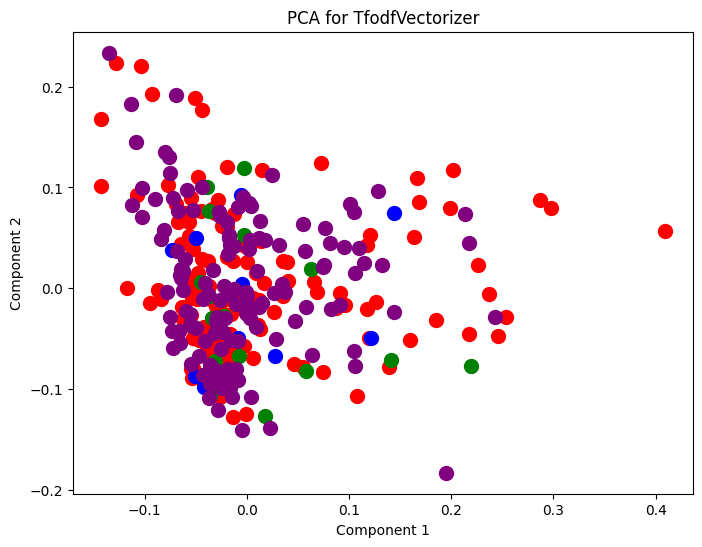

Like the other question, my data or code is probably wrong for PCA calculations, so I can't actually see any visually seperable classes
Still, if it did work as it should, I can assume taht joy and optimism would be visually seperable from sadness and pessimism


In [14]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

json_file_path = r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\validation.json'

class_selections = ['sadness', 'joy', 'optimism', 'pessimism']

tweets = []
labels = []

with open(json_file_path, 'r') as f:
    for line in f:
            record = json.loads(line)
            label = [cls for cls in class_selections if record.get(cls, False)]
            if label:
                labels.append(label[0])
                tweets.append(record['Tweet'])
                
def plot_pca(X, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    unique_labels = np.unique(labels)
    colors = ['red', 'green', 'blue', 'purple']
    
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(unique_labels):
        indices = [j for j, lbl in enumerate(labels) if lbl == label]
        plt.scatter(X_pca[indices, 0], X_pca[indices, 1], color=colors[i % len(colors)], label=label, s=100)
    
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

plot_pca(X.toarray(), labels, 'PCA for CountVectorizer')

vectorizer2 = TfidfVectorizer()
X2 = vectorizer2.fit_transform(corpus)

plot_pca(X2.toarray(), labels, 'PCA for TfodfVectorizer')

print("Like the other question, my data or code is probably wrong for PCA calculations, so I can't actually see any visually seperable classes")
print("Still, if it did work as it should, I can assume taht joy and optimism would be visually seperable from sadness and pessimism")
